## This script shows the visualization of electricity, water and gas consumption using carpet plots

To get started, first run the 'Synchronize data' script

#### Imports and paths

In [1]:
import os
import sys
import pytz
import time
import inspect
import numpy as np
import pandas as pd
import datetime as dt
import tmpo

from opengrid import config
from opengrid.library import houseprint

c=config.Config()

try:
    if os.path.exists(c.get('tmpo', 'data')):
        path_to_tmpo_data = c.get('tmpo', 'data')
except:
    path_to_tmpo_data = None

# configuration for the plots
DEV = c.get('env', 'type') == 'dev' # DEV is True if we are in development environment, False if on the droplet
print("Environment configured for development: {}".format(DEV))
if not DEV:
    # production environment: don't try to display plots
    # these lines has to be BEFORE any plt import, also in other packages.
    import matplotlib
    matplotlib.use('Agg') 

from opengrid.library import plotting
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, HourLocator, DateFormatter, AutoDateLocator, num2date

if DEV:
    if c.get('env', 'plots') == 'inline':
        %matplotlib inline
    else:
        %matplotlib qt
else:
    pass # don't try to render plots

plt.rcParams['figure.figsize'] = 16,8

# path to data
#path_to_data = c.get('data', 'folder')
#if not os.path.exists(path_to_data):
#    raise IOError("Provide your path to the data in your config.ini file. ")
#else:
#    path_to_fig = os.path.join(path_to_data, 'figures')
#    if not os.path.isdir(path_to_fig): os.makedirs(path_to_fig)

Environment configured for development: True


In [2]:
c.get('data','folder')

'/data'

### Loading meta data and user variables

In [3]:
hp = houseprint.Houseprint()

end = pd.Timestamp(time.time(), unit='s')
start = end - pd.Timedelta('21 days')

Opening connection to Houseprint sheet
Opening spreadsheets
Parsing spreadsheets
24 Sites created
24 Devices created
75 sensors created
Houseprint parsing complete


AttributeError: 'module' object has no attribute 'Timedelta'

In [ ]:
hp.save('new_houseprint.pkl')

In [ ]:
hp = houseprint.load_houseprint_from_file('new_houseprint.pkl')

In [4]:
pd.__version__

'0.13.1'

In [5]:
%%bash
pip install --upgrade pandas


Requirement already up-to-date: six>=1.5 in /usr/local/lib/python2.7/dist-packages (from python-dateutil->pandas)
  Running setup.py bdist_wheel for pandas: started
  Running setup.py bdist_wheel for pandas: still running...
  Running setup.py bdist_wheel for pandas: still running...
  Running setup.py bdist_wheel for pandas: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/9a/8c/95/ceb8f988caf19dd90c4c587eea0ee1665c3bb6af73b3ca8264
Successfully built pandas
  Found existing installation: python-dateutil 1.5
    Uninstalling python-dateutil-1.5:
      Successfully uninstalled python-dateutil-1.5
  Found existing installation: pytz 2012rc0
    Uninstalling pytz-2012rc0:
      Successfully uninstalled pytz-2012rc0
  Found existing installation: numpy 1.8.2
    Uninstalling numpy-1.8.2:
      Successfully uninstalled numpy-1.8.2
  Found existing installation: pandas 0.13.1
    Uninstalling pandas-0.13.1:
      Successfully uninstalled pandas-0.13.1


/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
    DEPRECATION: Un

## Plotting

In [ ]:
#hp.sync_tmpos()

### Water sensors

In [ ]:
water_sensors = hp.get_sensors(sensortype='water')
print("{} water sensors".format(len(water_sensors)))

In [ ]:
for sensor in water_sensors:
    ts = sensor.get_data(head=start, tail=end)
    if not ts.dropna().empty:
        plotting.carpet(ts, title=' - '.join([sensor.device.key, sensor.description, sensor.key]), zlabel=r'Flow [l/min]')
        plt.savefig(os.path.join(path_to_fig, 'carpet_'+sensor.type+'_'+sensor.key), dpi=100)
        if not DEV:
            plt.close()

### Gas sensors

In [5]:
gas_sensors = hp.get_sensors(sensortype=('gas'))
print("{} gas sensors".format(len(gas_sensors)))

20 gas sensors


Using tmpo database from /mnt/data/work/opengrid/data/.tmpo/tmpo.sqlite3


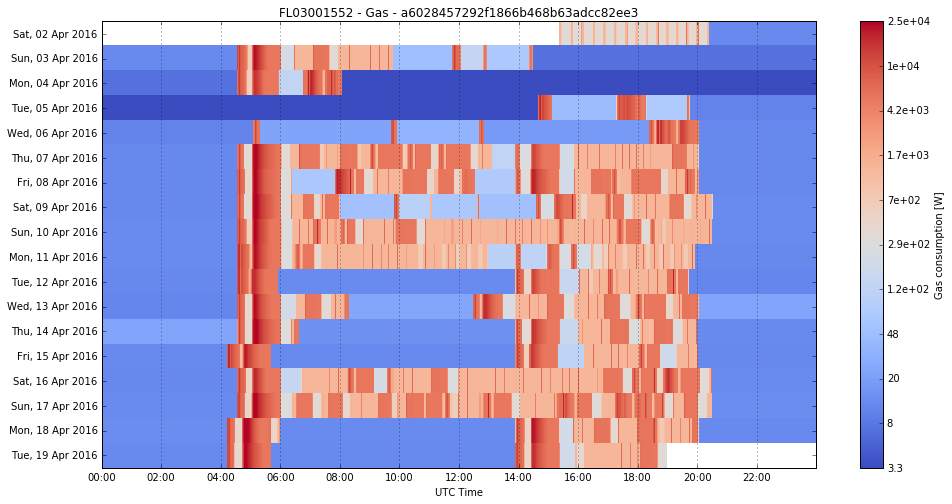

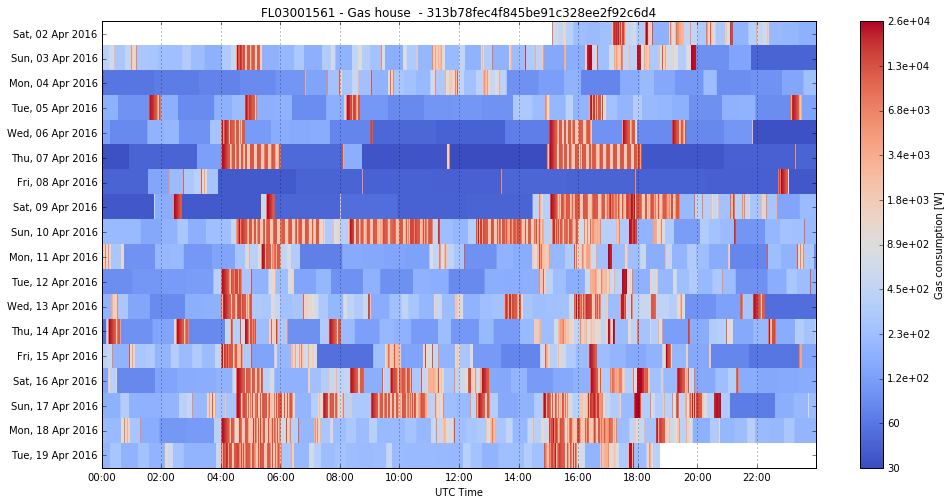

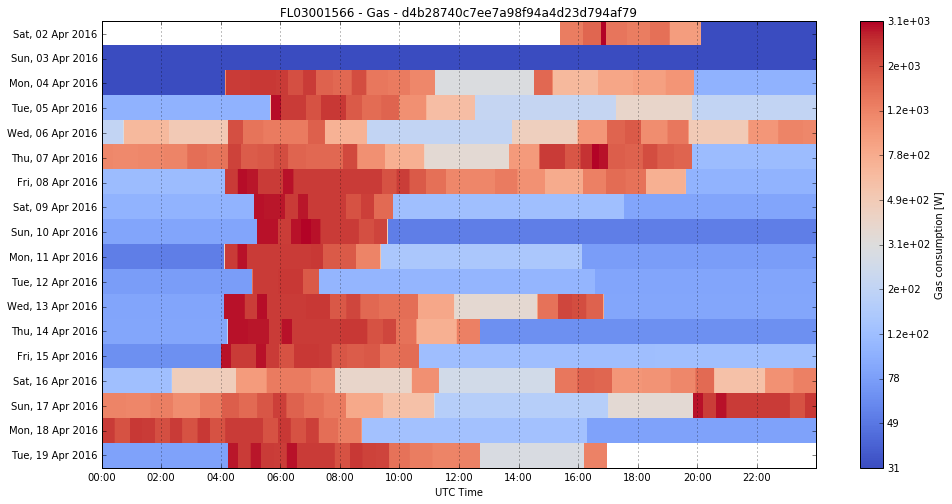

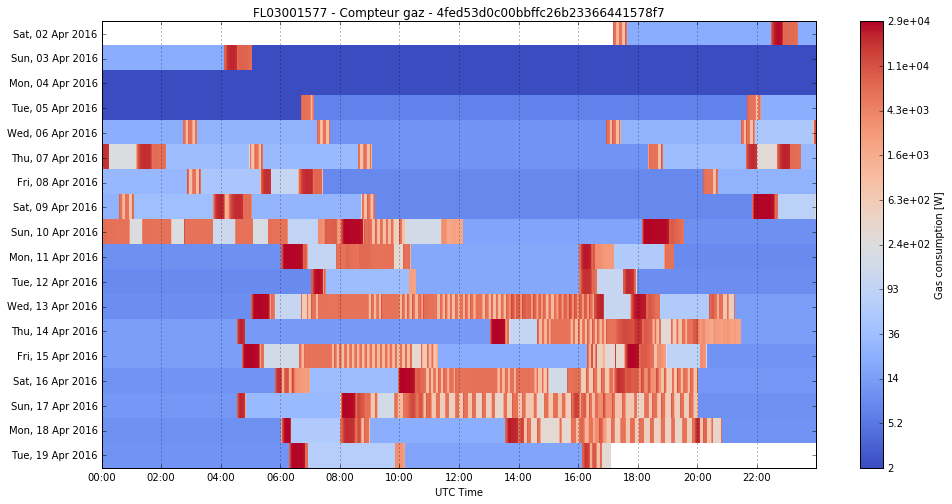

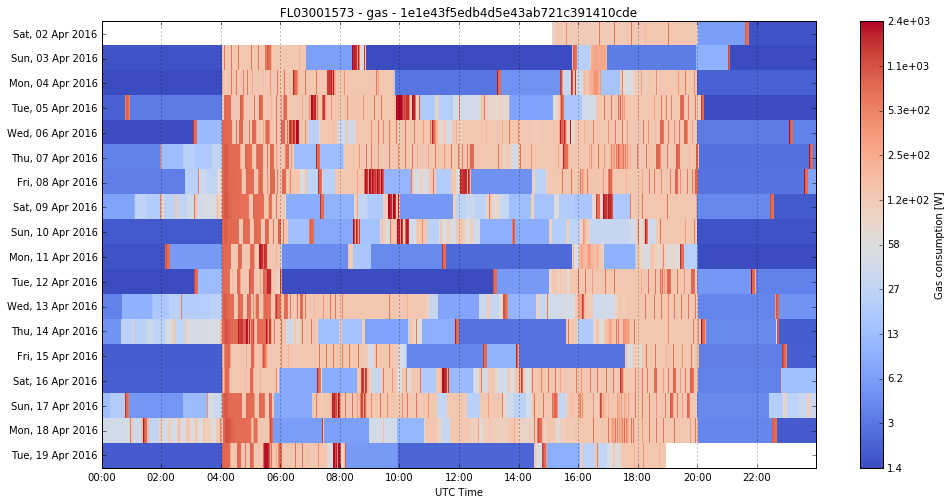

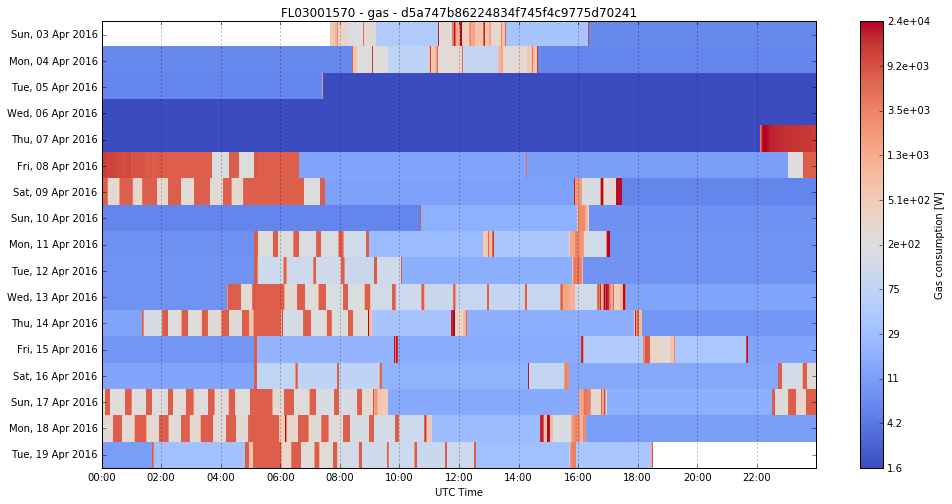

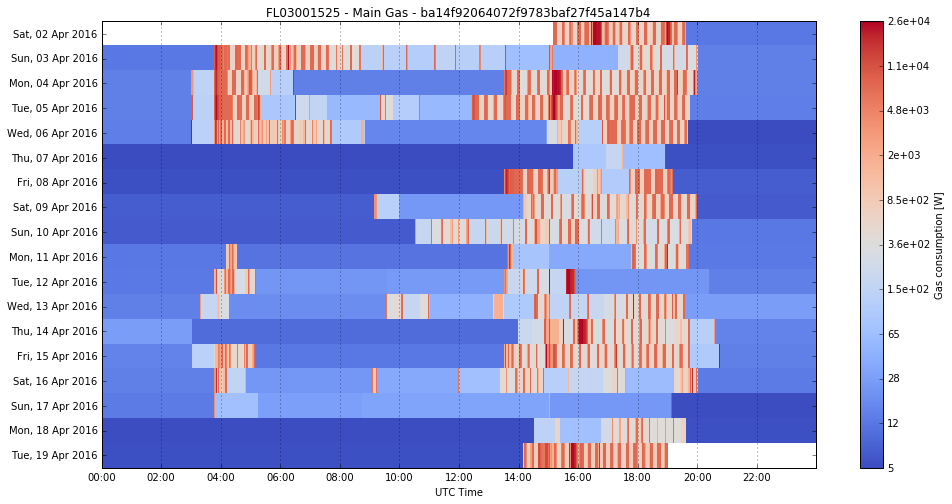

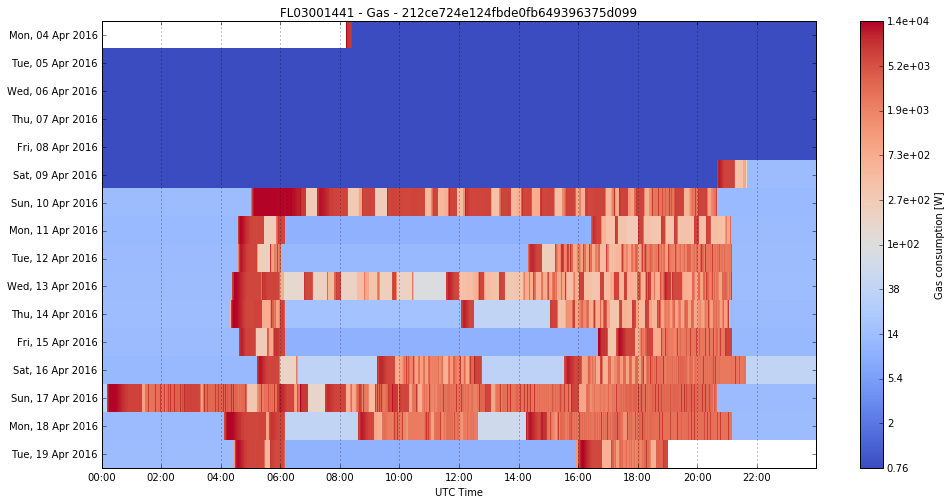

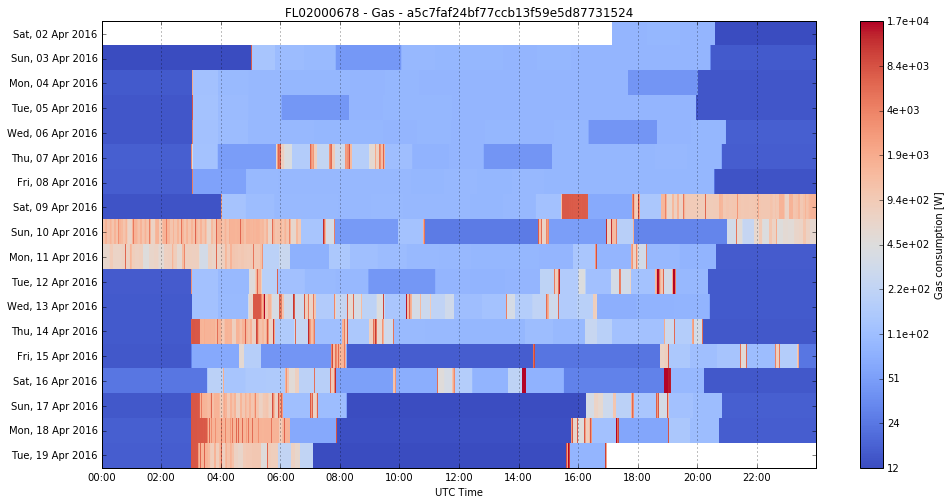

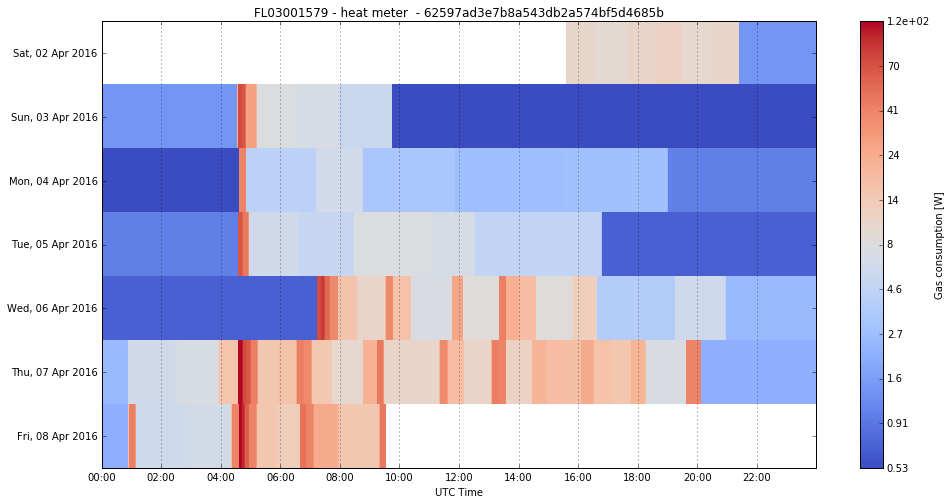

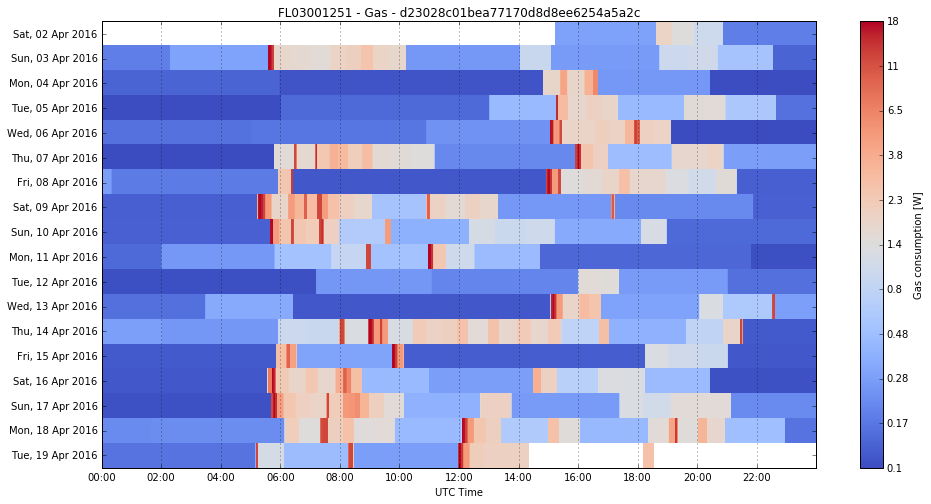

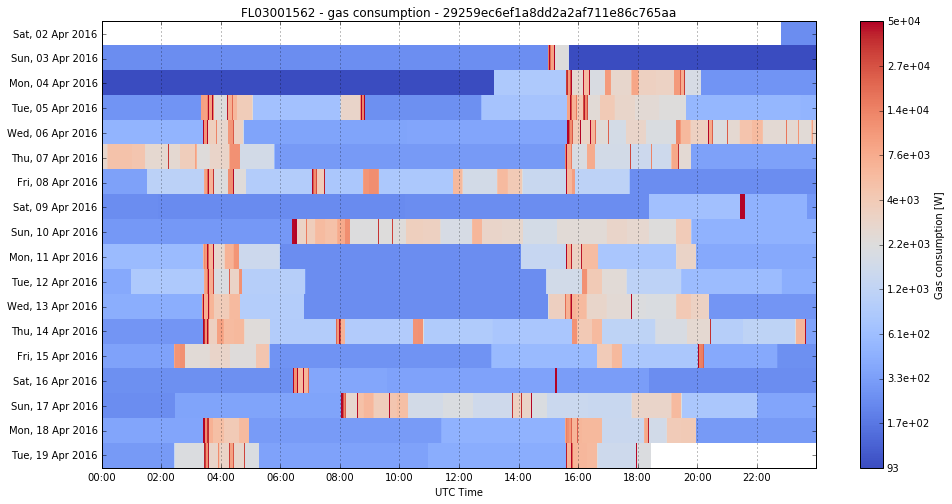

In [6]:
for sensor in gas_sensors:
    ts = sensor.get_data(head=start, tail=end)
    if not ts.dropna().empty:
        plotting.carpet(ts, title=' - '.join([sensor.device.key, sensor.description, sensor.key]), zlabel=r'Gas consumption [W]')
        plt.savefig(os.path.join(path_to_fig, 'carpet_'+sensor.type+'_'+sensor.key), dpi=100)
        if not DEV:
            plt.close()

### Electricity sensors

In [ ]:
elec_sensors = hp.get_sensors(sensortype=('electricity'))
print("{} electricity sensors".format(len(elec_sensors)))

In [ ]:
for sensor in elec_sensors:
    if not sensor.key.startswith('565de'): # 3E's sensor creates ram issues on the droplet.  To be fixed in tmpo?
        ts = sensor.get_data(head=start, tail=end)
        if not ts.dropna().empty:
            plotting.carpet(ts, title=' - '.join([sensor.device.key, sensor.description, sensor.key]), zlabel=r'Power [W]')
            plt.savefig(os.path.join(path_to_fig, 'carpet_'+sensor.type+'_'+sensor.key), dpi=100)
            if not DEV:
                plt.close()